# Preprocessing of Dataset/Visualization

Check imports and download dataset using kagglehub

In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vbookshelf/respiratory-sound-database")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Malik\.cache\kagglehub\datasets\vbookshelf\respiratory-sound-database\versions\2


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DATA_DIR = "C://Users/Malik/.cache/kagglehub/datasets/vbookshelf/respiratory-sound-database/versions/2/Respiratory_Sound_Database/Respiratory_Sound_Database"

Let's make a dataframe using the dataset's metadata file and visualize some of the audio files using librosa and matplotlib.

According to the dataset's description on Kaggle, the demographic info file has columns:
- Patient number
- Age
- Sex
- Adult BMI (kg/m2)
- Child Weight (kg)
- Child Height (cm)

Each audio file is named in the format:
"<patient number>_<recording number>_<chest location>_<acquisition mode>_<recording equipment>.wav"

Where:
- Patient number: 101, 102, ... , 226
- Recording index
- Chest location (Trachea (Tc), {Anterior (A), Posterior (P), Lateral (L)}{left (l), right (r)})
- Acquisition mode (sequential/single channel (sc), simultaneous/multichannel (mc))
- Recording equipment (AKG C417L Microphone, 3M Littmann Classic II SE Stethoscope, 3M Litmmann 3200 Electronic Stethoscope, WelchAllyn Meditron Master Elite Electronic Stethoscope)

For our purposes, we are mainly interested in the patient number and chest location, so we will extract these from the filenames and merge them with the demographic info (and also the diagnosis info).


In [21]:
diagnosis_df = pd.read_csv(os.path.join(DATA_DIR, "patient_diagnosis.csv"), names=["PatientID", "Diagnosis"], delimiter=",")
diagnosis_df.head()

,PatientID,Diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


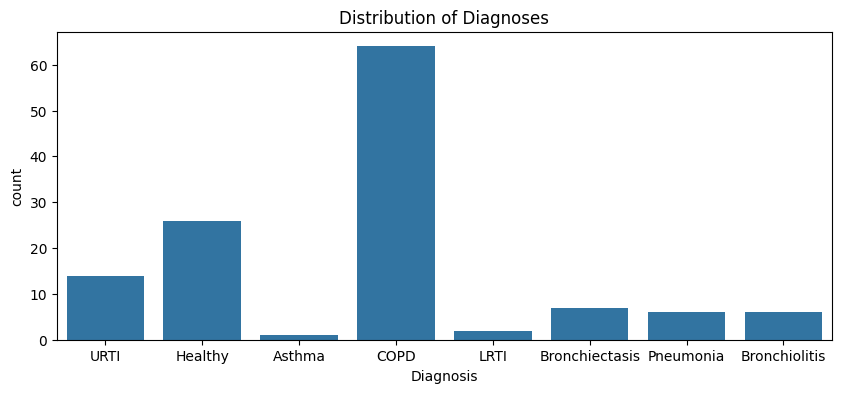

In [22]:
plt.figure(figsize=(10, 4))
sns.countplot(data=diagnosis_df, x='Diagnosis')
plt.title('Distribution of Diagnoses')
plt.show()

Rather diabolical class balance with how many COPD samples exist compared to the others... But if it affects model performance, we can always use class weights or oversampling techniques later on.

In [23]:
demographics_df = pd.read_csv(os.path.join(DATA_DIR, "demographic_info.txt"), names=["PatientID", "Age", "Sex",
                                                                                     "Adult BMI", "Child Weight", "Child Height"], 
                                                                                     delimiter=" ")
demographics_df.head()

,PatientID,Age,Sex,Adult BMI,Child Weight,Child Height
0,101,3.00,F,NaN,19.0,99.0
1,102,0.75,F,NaN,9.8,73.0
2,103,70.00,F,33.00,NaN,NaN
3,104,70.00,F,28.47,NaN,NaN
4,105,7.00,F,NaN,32.0,135.0


I believe it may be better to simply focus on presence/absence of wheeze/crackle sounds rather than the specific diagnosis, as the latter may be too complex for the model to learn given the limited data available for some classes.